# 轮廓属性

在这里，我们将学习提取一些常用的物体属性，如坚实度，等效直径，掩模图像，平均强度等。更多的功能可以在Matlab regionprops文档中找到。

*(注:质心、面积、周长等也属于这一类，但我们在上一章已经见过)*

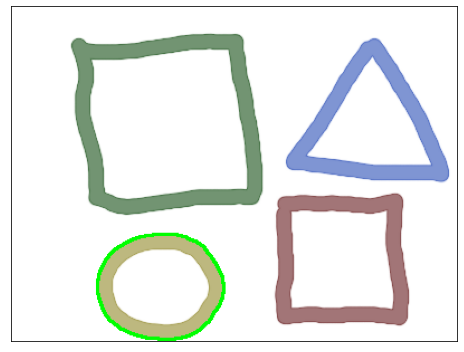

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

org = cv.imread('data/pic3.png')

img = org.copy()

imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret,thresh = cv.threshold(imgray,200,255,cv.THRESH_BINARY_INV)

contours,hierarchy = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# org = cv.imread('data/3.png', 0)

# ret,thresh = cv.threshold(org,127,255,cv.THRESH_BINARY)

# contours,hierarchy = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

cnt = contours[0]

# img = cv.cvtColor(org, cv.COLOR_GRAY2BGR)
cv.drawContours(img, [cnt], 0, (0,255,0), 2)

plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.xticks([]), plt.yticks([])

plt.show()

### 1. 长宽比

它是对象边界矩形的宽度与高度的比值。

$$
Aspect \; Ratio = \frac{Width}{Height}
$$

In [2]:
x,y,w,h = cv.boundingRect(cnt)
aspect_ratio = float(w)/h
print(aspect_ratio)

1.2


### 2. 范围

范围是轮廓区域与边界矩形区域的比值。

$$
Extent = \frac{Object \; Area}{Bounding \; Rectangle \; Area}
$$

In [3]:
area = cv.contourArea(cnt)
x,y,w,h = cv.boundingRect(cnt)
rect_area = w*h
extent = float(area)/rect_area
print(extent)

0.7775161588180979


### 3. 坚实度

坚实度是等高线面积与其凸包面积之比。

$$
Solidity = \frac{Contour \; Area}{Convex \; Hull \; Area}
$$

In [4]:
area = cv.contourArea(cnt)
hull = cv.convexHull(cnt)
hull_area = cv.contourArea(hull)
solidity = float(area)/hull_area
print(solidity)

0.9894829612220917


### 4. 等效直径

等效直径是面积与轮廓面积相同的圆的直径。

$$
Equivalent \; Diameter = \sqrt{\frac{4 \times Contour \; Area}{\pi}}
$$

In [5]:
area = cv.contourArea(cnt)
equi_diameter = np.sqrt(4*area/np.pi)
print(equi_diameter)

103.54377618400073


### 5. 取向

取向是物体指向的角度。以下方法还给出了主轴和副轴的长度。

In [6]:
(x,y),(MA,ma),angle = cv.fitEllipse(cnt)
print("(", x, y, "), (", MA, ma, "), ", angle)

( 133.28709411621094 251.08343505859375 ), ( 95.55023956298828 112.4897689819336 ),  90.26326751708984


### 6. 掩码和像素点

在某些情况下，我们可能需要构成该对象的所有点。可以按照以下步骤完成：

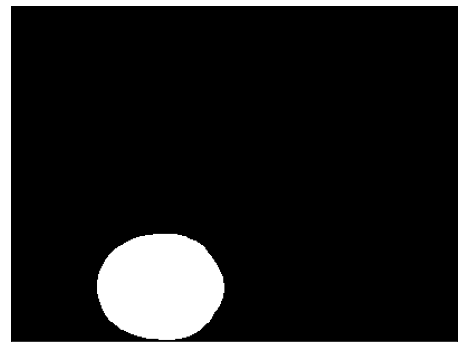

In [7]:
mask = np.zeros(imgray.shape,np.uint8)

cv.drawContours(mask,[cnt],0,255,-1)

plt.figure(figsize=(8, 8))
plt.imshow(mask, 'gray')
plt.xticks([]), plt.yticks([])

plt.show()

这里提供了两个方法，一个使用Numpy函数，另一个使用OpenCV函数(最后的注释行)。结果也是一样的，只是略有不同。Numpy给出的坐标是`(行、列)`格式，而OpenCV给出的坐标是`(x,y)`格式。所以基本上答案是可以互换的。注意，`row = x, column = y`。

In [8]:
pixelpoints = np.transpose(np.nonzero(mask))
#pixelpoints = cv.findNonZero(mask)
print(pixelpoints)

[[204 127]
 [204 128]
 [204 129]
 ...
 [298 144]
 [298 145]
 [298 146]]


### 7. 最大值，最小值和它们的位置

我们可以使用掩码图像找到这些参数。

In [9]:
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(imgray,mask = mask)
print(min_val, max_val, min_loc, max_loc)

143.0 255.0 (122, 205) (125, 219)


### 8. 平均颜色或平均强度

在这里，我们可以找到对象的平均颜色。或者可以是灰度模式下物体的平均强度。我们再次使用相同的掩码进行此操作。

In [10]:
mean_val = cv.mean(img,mask = mask)
print(mean_val)

(208.1684750904212, 227.16287481040717, 183.88601096721501, 0.0)


### 9. 极端点

极点是指对象的最顶部，最底部，最右侧和最左侧的点。

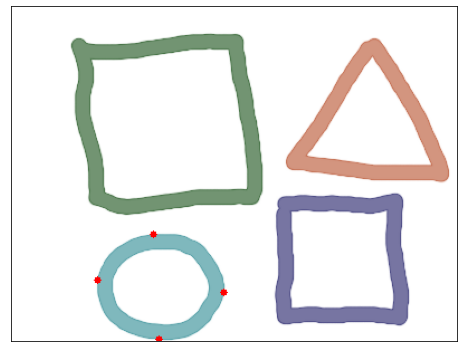

In [11]:
img = org.copy()

leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

cv.circle(img, leftmost, 3, (0, 0, 255), -1)
cv.circle(img, rightmost, 3, (0, 0, 255), -1)
cv.circle(img, topmost, 3, (0, 0, 255), -1)
cv.circle(img, bottommost, 3, (0, 0, 255), -1)

plt.figure(figsize=(8, 8))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])

plt.show()

### 附加资源

### 练习

1. matlab的regionprops doc中仍然有一些特性。试着去实现它们。